##### AUTOENCODERS

In [46]:
import tensorflow as tf

In [8]:
print(tf.__version__)

2.12.0


In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [11]:
digitos = load_digits()
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [12]:
digitos["data"][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
digitos["data"][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

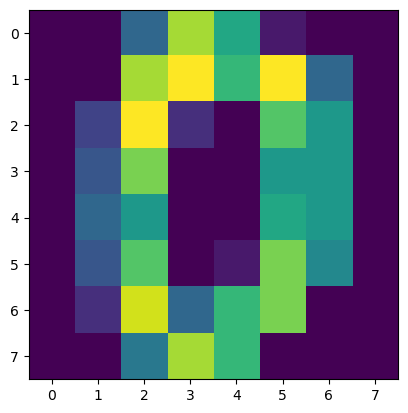

In [16]:
plt.imshow(digitos["data"][0].reshape(8,8))

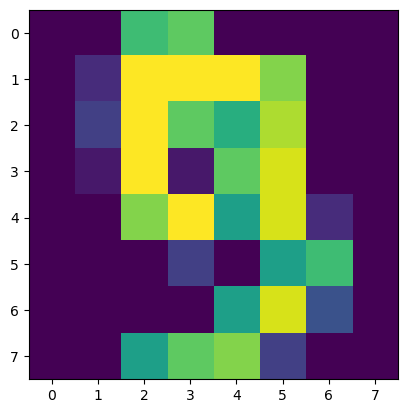

In [20]:
plt.imshow(digitos["data"][9].reshape(8,8))

In [22]:
X = digitos.data

In [23]:
X = X/16.0

In [29]:
x_entrena, x_prueba = train_test_split(x, test_size= 0.2, random_state = 42)

In [30]:
imagen_entrada = Input(shape = (64, ))

In [40]:
codificado = Dense(32, activation = 'relu'), (imagen_entrada)

In [50]:
decodificado = Dense(64, activation='sigmoid') (codificado)

TypeError: Inputs to a layer should be tensors. Got '<keras.layers.core.dense.Dense object at 0x00000151EB9B96D0>' (of type <class 'keras.layers.core.dense.Dense'>) as input for layer 'dense_8'.

In [49]:
autoencoder = Model(imagen_entrada, decodificado)

ValueError: Output tensors of a Functional model must be the output of a TensorFlow `Layer` (thus holding past layer metadata). Found: <keras.layers.core.dense.Dense object at 0x00000151EB9B9B50>

In [ ]:
autoencoder.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy')

In [ ]:
autoencoder = fit(X_entrena,
                 X_entrena,
                 epochs=100,
                 batch_size=256,
                 shuffle = True,
                 validation_data = (X_prueba, X_prueba))